In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

### Read data and basic stuff

In [9]:
baseDir = "../data/Google Merchandise Store Datasets"
csvsPath = list(map(lambda x : "%s/%s" % (baseDir, x), filter(lambda x : x.endswith(".csv"), os.listdir(baseDir))))
data = [pd.read_csv(csvPath, skiprows=6) for csvPath in csvsPath]
data = pd.concat(data)

print("Shape & columns:", data.shape, data.columns)
print("_______________________________________________")
display(data.head(10))
print("_______________________________________________")
display(data.describe())
print("_______________________________________________")

origData = data.copy()

display(data[(data["Source / Medium"] == "google / cpc") & (data["Campaign"] == " AW - Google Brand")].head(10))

Shape & columns: (64903, 16) Index(['Date', 'Source / Medium', 'Campaign', 'Device Category', 'Users',
       'Sessions', 'Transactions', 'Cost', 'Revenue', 'Product Detail Views',
       'Product Adds To Cart', 'Product Checkouts', 'Session Duration',
       'Total Unique Searches', 'Pageviews', 'New Users'],
      dtype='object')
_______________________________________________


,Date,Source / Medium,Campaign,Device Category,Users,Sessions,Transactions,Cost,Revenue,Product Detail Views,Product Adds To Cart,Product Checkouts,Session Duration,Total Unique Searches,Pageviews,New Users
0,20200326,google / organic,(not set),mobile,9,9,0,$0.00,$0.00,9,0,0,00:05:50,0,18,9
1,20200326,Partners / affiliate,Data Share Promo,desktop,9,9,0,$0.00,$0.00,0,0,0,00:05:31,0,18,9
2,20200325,(direct) / (none),(not set),desktop,37,37,0,$0.00,$0.00,0,0,0,01:02:18,0,138,28
3,20200325,analytics.google.com / referral,(not set),desktop,9,9,0,$0.00,$0.00,0,0,0,00:00:00,0,9,9
4,20200325,creatoracademy.youtube.com / referral,(not set),desktop,9,9,0,$0.00,$0.00,0,0,0,00:00:00,0,9,9
5,20200325,google / organic,(not set),desktop,212,230,0,$0.00,$0.00,83,18,0,13:11:00,0,700,193
6,20200325,google / organic,(not set),mobile,46,64,0,$0.00,$0.00,18,0,0,01:26:51,0,110,37
7,20200325,google / organic,(not set),tablet,9,9,0,$0.00,$0.00,0,0,0,00:02:37,0,18,9
8,20200325,mall.googleplex.com / referral,(not set),desktop,9,9,0,$0.00,$0.00,0,0,0,00:08:54,0,46,9
9,20200325,Partners / affiliate,Data Share Promo,desktop,18,18,0,$0.00,$0.00,0,0,0,00:43:25,0,28,18


_______________________________________________


,Date,Transactions
count,6.490300e+04,64903.000000
mean,2.016769e+07,0.978368
std,1.841690e+04,5.255717
min,2.013060e+07,0.000000
25%,2.015092e+07,0.000000
50%,2.017042e+07,0.000000
75%,2.018101e+07,0.000000
max,2.020033e+07,258.000000


_______________________________________________


,Date,Source / Medium,Campaign,Device Category,Users,Sessions,Transactions,Cost,Revenue,Product Detail Views,Product Adds To Cart,Product Checkouts,Session Duration,Total Unique Searches,Pageviews,New Users
38,20200323,google / cpc,AW - Google Brand,desktop,9,9,0,$0.00,$0.00,18,0,0,01:26:51,0,147,0
143,20200318,google / cpc,AW - Google Brand,desktop,9,9,0,$0.00,$0.00,0,0,0,00:00:00,0,9,0
266,20200312,google / cpc,AW - Google Brand,desktop,9,18,0,$0.00,$0.00,9,0,0,00:26:05,0,55,0
332,20200309,google / cpc,AW - Google Brand,desktop,28,28,0,$5.31,$0.00,28,0,0,00:11:30,0,83,9
333,20200309,google / cpc,AW - Google Brand,mobile,9,9,0,$0.25,$0.00,0,0,0,00:00:00,0,9,0
366,20200308,google / cpc,AW - Google Brand,desktop,46,46,0,$8.60,$0.00,28,0,0,01:27:19,0,193,9
367,20200308,google / cpc,AW - Google Brand,mobile,18,28,0,$3.78,$0.00,9,9,0,01:50:01,0,166,18
368,20200308,google / cpc,AW - Google Brand,tablet,0,0,0,$0.01,$0.00,0,0,0,00:00:00,0,0,0
403,20200307,google / cpc,AW - Google Brand,desktop,28,28,0,$7.97,$0.00,0,0,0,00:57:14,0,138,18
404,20200307,google / cpc,AW - Google Brand,mobile,28,28,0,$3.48,$0.00,37,0,0,09:20:04,0,396,18


### 1. We see that not all columns are numerical, and some of them (date) are, but shouldn't. Thus, we must do a little data transforming.

#### 1.1 Cost and revenue must remove the $ sign at start and convert to float

In [3]:
print(origData["Cost"].unique().shape, origData["Revenue"].unique().shape)
print(origData["Cost"].dtype, origData["Revenue"].dtype)
data["Cost"] = origData["Cost"].map(lambda x : float(x[1:].replace(",", "")))
data["Revenue"] = origData["Revenue"].map(lambda x : float(x[1:].replace(",", "")))
print(data["Cost"].unique().shape, data["Revenue"].unique().shape)
print(data["Cost"].dtype, data["Revenue"].dtype)

# Sanity check to see we don't break anything
assert data["Cost"].unique().shape[0] == origData["Cost"].unique().shape[0]
assert data["Revenue"].unique().shape[0] == origData["Revenue"].unique().shape[0]

(2799,) (2590,)
object object
(2799,) (2590,)
float64 float64


In [4]:
print("Cost:\n", origData["Cost"].unique()[0:10], "=>\n", data["Cost"].unique()[0:10])
print("Revenue:\n", origData["Revenue"].unique()[0:10], "=>\n", data["Revenue"].unique()[0:10])

Cost:
 ['$0.00' '$0.75' '$0.93' '$0.72' '$5.31' '$0.25' '$1.45' '$0.79' '$0.91'
 '$0.74'] =>
 [0.   0.75 0.93 0.72 5.31 0.25 1.45 0.79 0.91 0.74]
Revenue:
 ['$0.00' '$202.54' '$384.83' '$810.18' '$874.62' '$161.11' '$1,022.85'
 '$248.58' '$487.95' '$568.51'] =>
 [   0.    202.54  384.83  810.18  874.62  161.11 1022.85  248.58  487.95
  568.51]


### 1.2 Date as Date and Session Duration in seconds

In [5]:
data["Date"] = pd.to_datetime(origData["Date"], format="%Y%m%d")
print(origData["Date"][0:5].to_numpy(), "=>", data["Date"][0:5].to_numpy())
data["Session Duration (s)"] = origData["Session Duration"].map(lambda x : x.split(":")).map(lambda x : float(x[2])*3600+float(x[1])*60+float(x[0]))
print(data["Session Duration (s)"].dtype, data["Session Duration (s)"].unique().shape[0])


[20200326 20200326 20200325 20200325 20200325] => ['2020-03-26T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-25T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000']
float64 8413


### 1.3 Source / Medium

Split this into two columns

In [6]:
print("Before:", origData["Source / Medium"].unique().shape, origData["Source / Medium"].unique()[0:5])
data["Source"] = origData["Source / Medium"].map(lambda x : x.split(" / ")[0].strip())
data["Medium"] = origData["Source / Medium"].map(lambda x : x.split(" / ")[1].strip())
data["Campaign"] = origData["Campaign"].map(lambda x : x.strip())

print("After:")
print(data["Source"].unique().shape, data["Source"].unique()[0:5])
print(data["Medium"].unique().shape, data["Medium"].unique())

Before: (678,) ['google / organic' 'Partners / affiliate' '(direct) / (none)'
 'analytics.google.com / referral' 'creatoracademy.youtube.com / referral']
After:
(670,) ['google' 'Partners' '(direct)' 'analytics.google.com'
 'creatoracademy.youtube.com']
(16,) ['organic' 'affiliate' '(none)' 'referral' 'cpm' '(not set)' 'cpc' 'email'
 'Test2' 'AEK' 'test' 'caitlin' 'Testing' 'Google Analytics Training'
 'exercise' 'code']


In [7]:
data["Sessions"] = data["Sessions"].map(lambda x : int(str(x).replace(",", "")))

### 1.5... TODO: Rest of changes when needed

### 1.N Seeing the changes

In [8]:
display(pd.DataFrame([data.dtypes], columns=data.columns))
display(data.describe())

,Date,Source / Medium,Campaign,Device Category,Users,Sessions,Transactions,Cost,Revenue,Product Detail Views,Product Adds To Cart,Product Checkouts,Session Duration,Total Unique Searches,Pageviews,New Users,Session Duration (s),Source,Medium
0,datetime64[ns],object,object,object,object,int64,int64,float64,float64,object,object,object,object,object,object,object,float64,object,object


,Sessions,Transactions,Cost,Revenue,Session Duration (s)
count,64903.000000,64903.000000,64903.000000,64903.000000,64903.000000
mean,69.342249,0.978368,2.371590,153.958797,56286.609355
std,175.277890,5.255717,8.582958,1110.908261,70178.643517
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,0.000000,9842.000000
75%,37.000000,0.000000,1.320000,0.000000,112020.000000
max,4161.000000,258.000000,331.990000,59442.220000,215945.000000


## 2. Data analysis


### 2.1 Minimum relevant columns: Date, Cost, Revenue, Source, Medium, Campaign.

Remember: We're trying to predict a f(Cost) = f(Cost(t) | Cost(t-1), Revenue(t-1), ... Cost(t0), Revenue(t0)) = Revenue function, so this is the minimum relevant information (no extra features) for such a model. After we have our baselines, we'll think about how to improve the results.

In [9]:
minColumns = ["Date", "Cost", "Revenue", "Source",  "Medium", "Campaign", "Sessions"]
minDf = data[minColumns]

for column in minColumns:
    print("%s. Dtype: %s. Count: %d" % (column, minDf[column].dtype, minDf[column].unique().shape[0]))

Date. Dtype: datetime64[ns]. Count: 2382
Cost. Dtype: float64. Count: 2799
Revenue. Dtype: float64. Count: 2590
Source. Dtype: object. Count: 670
Medium. Dtype: object. Count: 16
Campaign. Dtype: object. Count: 74
Sessions. Dtype: int64. Count: 241


### 2.2 First, let's see the correlation between the 3 relevant columns (Source, Medium and Campaign) against the Cost and Revenue.

In [10]:
def minMax(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-8)

def doBarh(x, cost, revenue, session):
    print(x.name, x.unique().shape)
    keys = x.unique()
    sessions, costs, revenues = np.zeros((3, len(keys)), dtype=np.float32)
    for i, item in enumerate(x.unique()):
        where = x == item
        sessions[i] = session[where].sum()
        costs[i] = cost[where].sum()
        revenues[i] = revenue[where].sum()

    stuff = {
        "Sessions" : sessions,
        "Cost" : costs,
        "Revenue" : revenues,
        "Revenue / Sessions" : revenues / (sessions + 1e-8),
        "Revenue - Cost" : revenues - costs
    }
    argSort = np.argsort(revenues - costs)[::-1]
    stuff = {k : stuff[k][argSort][0 : 10] for k in stuff}
    keys = keys[argSort][0 : 10]
        
    df = pd.DataFrame(stuff, index=keys)
    df.plot.barh(title="%s (raw, sorted by Revenue - Cost)" % (x.name))
    df = pd.DataFrame({k : minMax(stuff[k]) for k in stuff}, index=keys)
    df.plot.barh(title="%s (normalized)" % (x.name))

Source (670,)


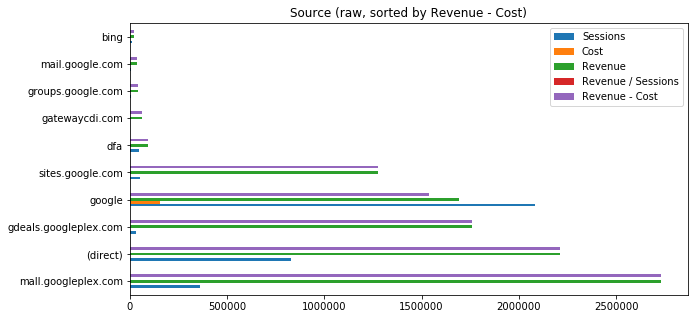

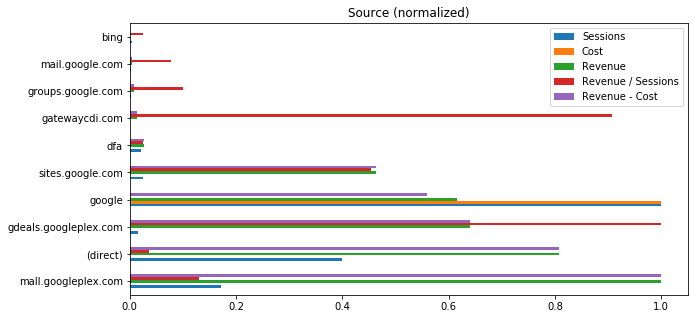

In [11]:
doBarh(minDf["Source"], minDf["Cost"], minDf["Revenue"], minDf["Sessions"])

In [12]:
print(minDf.loc[minDf["Cost"] > 0, "Source"].unique())

['google']


We observe that the only Source that has any Cost is 'google', so we're only going to keep that. Again, this is because our input is f(Cost) = Revenue, so we can't work with 'organic', for example, because there is no cost there :). Other type of analysis might work on organic, such as a correlation between various ad campaigns and organic search.

In [13]:
relevantDfOnlyGoogleSource = minDf[minDf["Source"] == "google"].drop(columns=["Source"])
print(relevantDfOnlyGoogleSource.shape)
for column in relevantDfOnlyGoogleSource.columns:
    print("%s. Dtype: %s. Count: %d" % (column, relevantDfOnlyGoogleSource[column].dtype, relevantDfOnlyGoogleSource[column].unique().shape[0]))

(30654, 6)
Date. Dtype: datetime64[ns]. Count: 2382
Cost. Dtype: float64. Count: 2799
Revenue. Dtype: float64. Count: 896
Medium. Dtype: object. Count: 5
Campaign. Dtype: object. Count: 33
Sessions. Dtype: int64. Count: 157


Medium (5,)


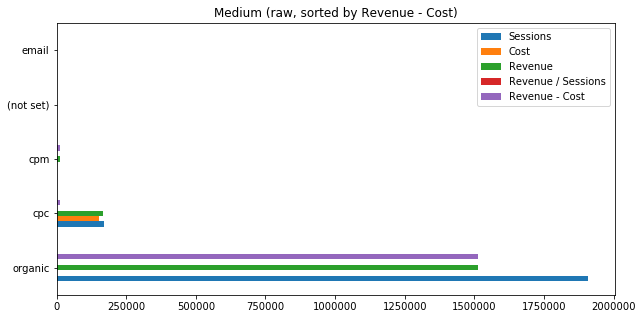

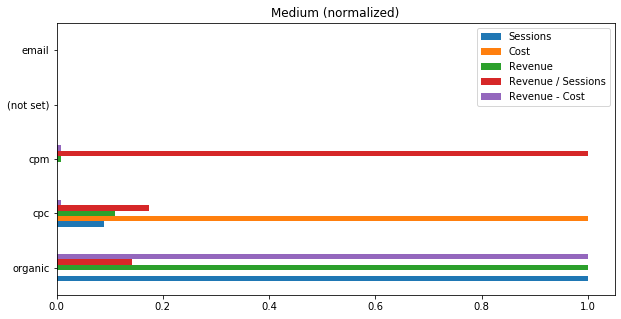

In [14]:
doBarh(relevantDfOnlyGoogleSource["Medium"], relevantDfOnlyGoogleSource["Cost"], \
       relevantDfOnlyGoogleSource["Revenue"], relevantDfOnlyGoogleSource["Sessions"])

Doing a similar analysis, we see that only the Medium with value "cpc", has any sort of Cost, so again, we only keep this.

In [15]:
print(relevantDfOnlyGoogleSource.loc[relevantDfOnlyGoogleSource["Cost"] > 0, "Medium"].unique())

['cpc']


So, we'll keep only this as well

(25254, 6)
Date. Dtype: datetime64[ns]. Count: 2179
Cost. Dtype: float64. Count: 2799
Revenue. Dtype: float64. Count: 173
Medium. Dtype: object. Count: 1
Campaign. Dtype: object. Count: 32
Sessions. Dtype: int64. Count: 57
Campaign (32,)


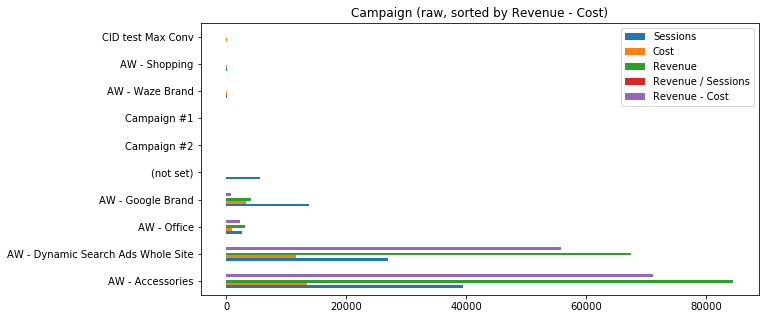

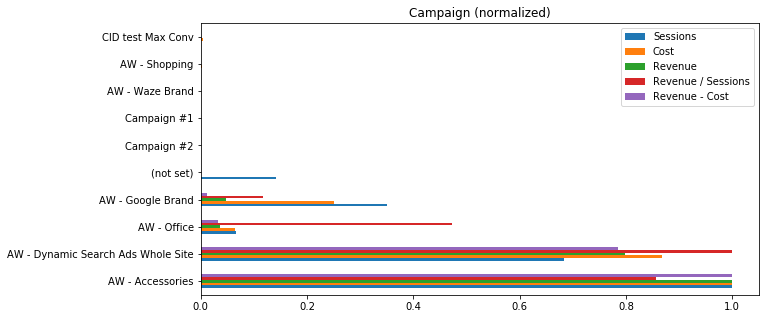

In [16]:
relevantDf = relevantDfOnlyGoogleSource[relevantDfOnlyGoogleSource["Medium"] == "cpc"]
print(relevantDf.shape)
for column in relevantDf.columns:
    print("%s. Dtype: %s. Count: %d" % (column, relevantDf[column].dtype, relevantDf[column].unique().shape[0]))

doBarh(relevantDf["Campaign"], relevantDf["Cost"], relevantDf["Revenue"], relevantDf["Sessions"])

#### 2.2 Find only those filtered data based on some heuristics

In [17]:
costPositiveDf = relevantDf[relevantDf["Cost"] > 0]
costPositiveCampaigns = costPositiveDf["Campaign"].unique()
print("Cost positive campaigns:", np.array(costPositiveCampaigns))

validCampaigns = []
for campaign in costPositiveCampaigns:
    dfRelevant = costPositiveDf[costPositiveDf["Campaign"] == campaign]
    # Simple model, assume there is a linear connection between number of sessions and total revenue
    sumSessions = dfRelevant["Sessions"].sum()
    sumRevenue = dfRelevant["Revenue"].sum()
    sumCost = dfRelevant["Cost"].sum()
    if sumSessions == 0:
        print("Campaign '%s' has 0 sessions" % (campaign))
    if sumRevenue == 0:
        print("Campaign '%s' has 0 revenue" % (campaign))
    if sumCost == 0:
        print("Campaign '%s' has 0 cost" % (campaign))
    if sumSessions > 0 and sumRevenue > 0 and sumCost > 0:
        validCampaigns.append(campaign)

print("Valid campaigns:", np.array(validCampaigns))
validDf = costPositiveDf[costPositiveDf["Campaign"].isin(validCampaigns)]

Cost positive campaigns: ['AW - Accessories' 'AW - Bags' 'AW - Google Brand' 'AW - Office'
 'AW - YouTube' 'AW - Apparel' 'AW - Drinkware' 'AW - Android Brand'
 'AW - Shopping' 'All Products' 'AW - Electronics' 'Accessories - Generic'
 'Bags' 'Fun - Brand' 'Fun - Generic' 'Merchandise Store nFu'
 'Office - Brand' 'Wearables - Generic' 'Office - Generic'
 'AW - Dynamic Search Ads Whole Site' 'Smart Display Campaign'
 '1000557 | GA | US | en | Hybrid | GDN Remarketing'
 '1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS'
 'Wearables - Brand'
 '1000748 | Non House Ad (Eng Test) | US | en | Hybrid | Text | BKWS'
 'Campaign #2' 'Campaign #1' 'CID test Max Conv' 'CID test TCPA'
 'AW - Waze Brand' 'AW - YouTube Brand']
Campaign 'AW - Drinkware' has 0 revenue
Campaign 'AW - Android Brand' has 0 revenue
Campaign 'AW - Shopping' has 0 revenue
Campaign 'AW - Electronics' has 0 revenue
Campaign 'Accessories - Generic' has 0 revenue
Campaign 'Bags' has 0 revenue
Campaign 'Fun - Brand' has 0 re

### Now, we filtered only our relevant data: those Campaigns where money was invested (Cost > 0)

Let's see what else we can find about this data, w.r.t the relevant campaigns.

In [18]:
print("Valid df:", validDf.shape)
assert (validDf["Cost"] == 0).sum() == 0

Valid df: (11127, 6)


## 3. Data analysis only on Cost positive data

### 3.1 Analysis of Revenue - Cost (profit)

### 3.1.1 Barh on all positive campaings

['AW - Accessories' 'AW - Google Brand' 'AW - Office'
 'AW - Dynamic Search Ads Whole Site']


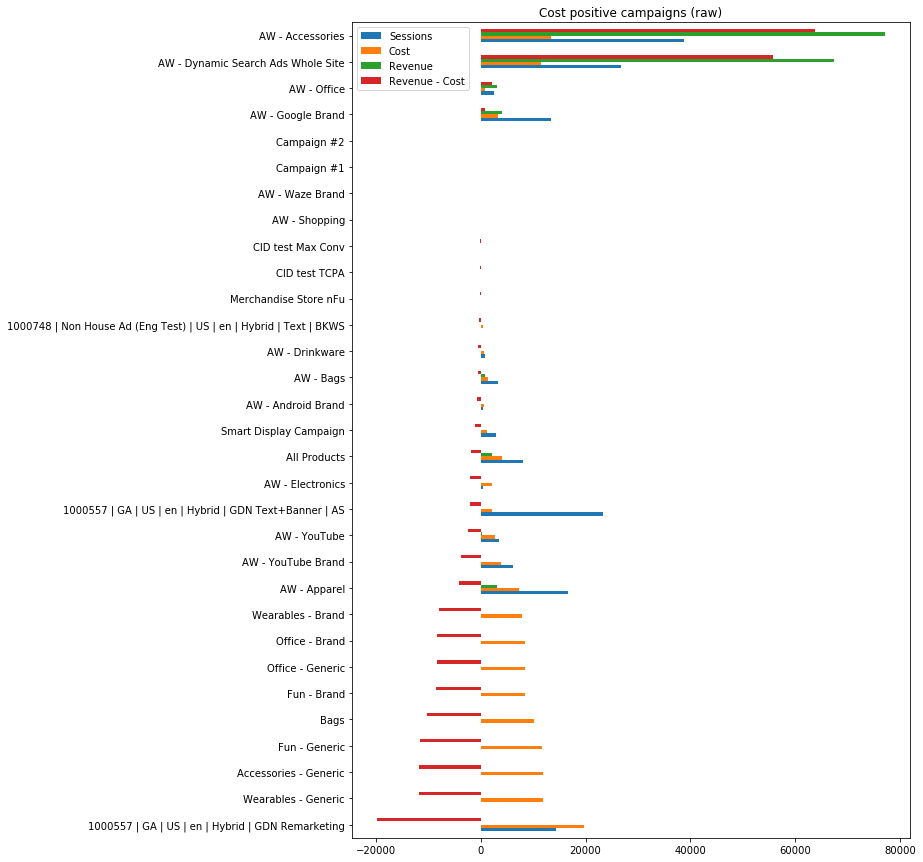

In [19]:
campaigns = costPositiveDf["Campaign"].unique()
sessions, costs, revenues = np.zeros((3, len(campaigns)), dtype=np.float32)
for i, campaign in enumerate(campaigns):
    relevantData = costPositiveDf[costPositiveDf["Campaign"] == campaign]
    sessions[i] = relevantData["Sessions"].sum()
    costs[i] = relevantData["Cost"].sum()
    revenues[i] = relevantData["Revenue"].sum()

stuff = {
    "Sessions" : sessions,
    "Cost" : costs,
    "Revenue" : revenues,
    "Revenue - Cost" : revenues - costs
}
argSort = np.argsort(revenues - costs)
df = pd.DataFrame({k : stuff[k][argSort] for k in stuff}, index=campaigns[argSort])
df.plot.barh(title="Cost positive campaigns (raw)", figsize=(10, 15))

positiveRevenueCampaigns = campaigns[(revenues - costs) > 0]
print(positiveRevenueCampaigns)

We can observe that only a small amount of campaigns yield any sort of benefit. Most of them are just monkey sinks. We cannot know for sure why. In statistics, the data is the result of a combination of hidden factors that we can't control and the signal in the data itself is only as strong as the information is offers. 

The only things we can say for sure is that Accessories, Dynamic Search, Office and Google Brand, through investment, yields some sort of positive revenue. This could be because there are simply more users there, thus the reach is higher. Perhaps the keywords are better, perhaps the audience is more interested there. We can't know for sure from this data alone.

We observe that the other campaigns also bring users to the table, but those simply don't convert. The money invested may not be useless (as in those users could come back later through organic search -- we don't know this for sure from this data alone), however, the only thing we can extract is that, all these campaigns, while bringing traffic, offer almost nothing in term of revenue.

#### 3.1.2 Analysis only on relevant data (revenue or sessions >0)

['AW - Accessories' 'AW - Google Brand' 'AW - Office'
 'AW - Dynamic Search Ads Whole Site']


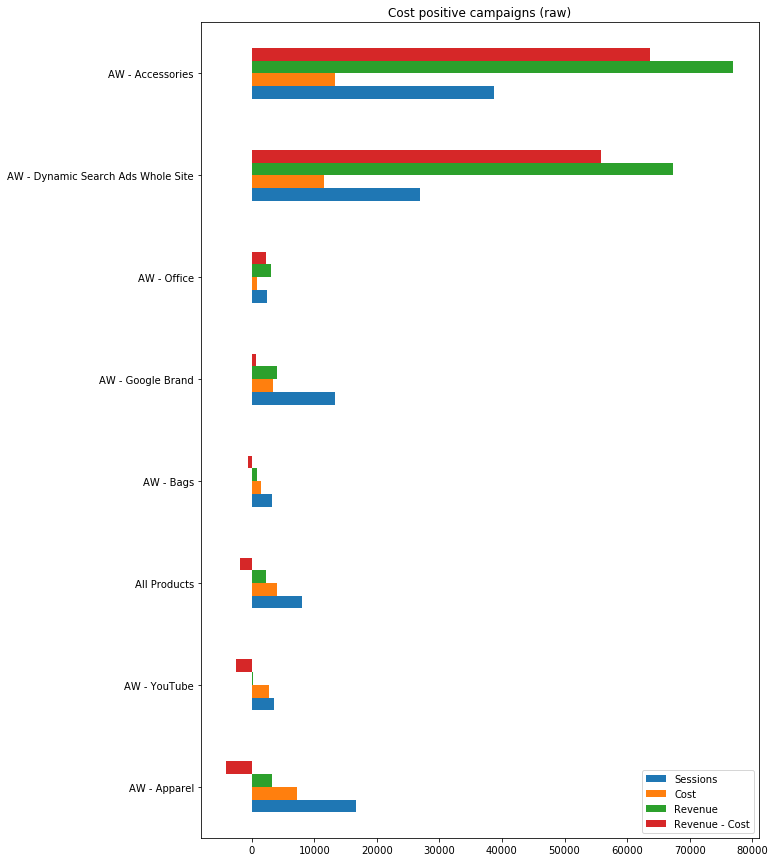

In [20]:
campaigns = validDf["Campaign"].unique()
sessions, costs, revenues = np.zeros((3, len(campaigns)), dtype=np.float32)
for i, campaign in enumerate(campaigns):
    relevantData = validDf[validDf["Campaign"] == campaign]
    sessions[i] = relevantData["Sessions"].sum()
    costs[i] = relevantData["Cost"].sum()
    revenues[i] = relevantData["Revenue"].sum()

stuff = {
    "Sessions" : sessions,
    "Cost" : costs,
    "Revenue" : revenues,
    "Revenue - Cost" : revenues - costs
}
argSort = np.argsort(revenues - costs)
df = pd.DataFrame({k : stuff[k][argSort] for k in stuff}, index=campaigns[argSort])
df.plot.barh(title="Cost positive campaigns (raw)", figsize=(10, 15))

positiveRevenueCampaigns = campaigns[(revenues - costs) > 0]
print(positiveRevenueCampaigns)

### 3.2 Time series analysis (month)


#### 3.2.1 Each campaign independently
We have so far ignored the date from this notebook, however, it's important to know the evolution of the revenue in time. 

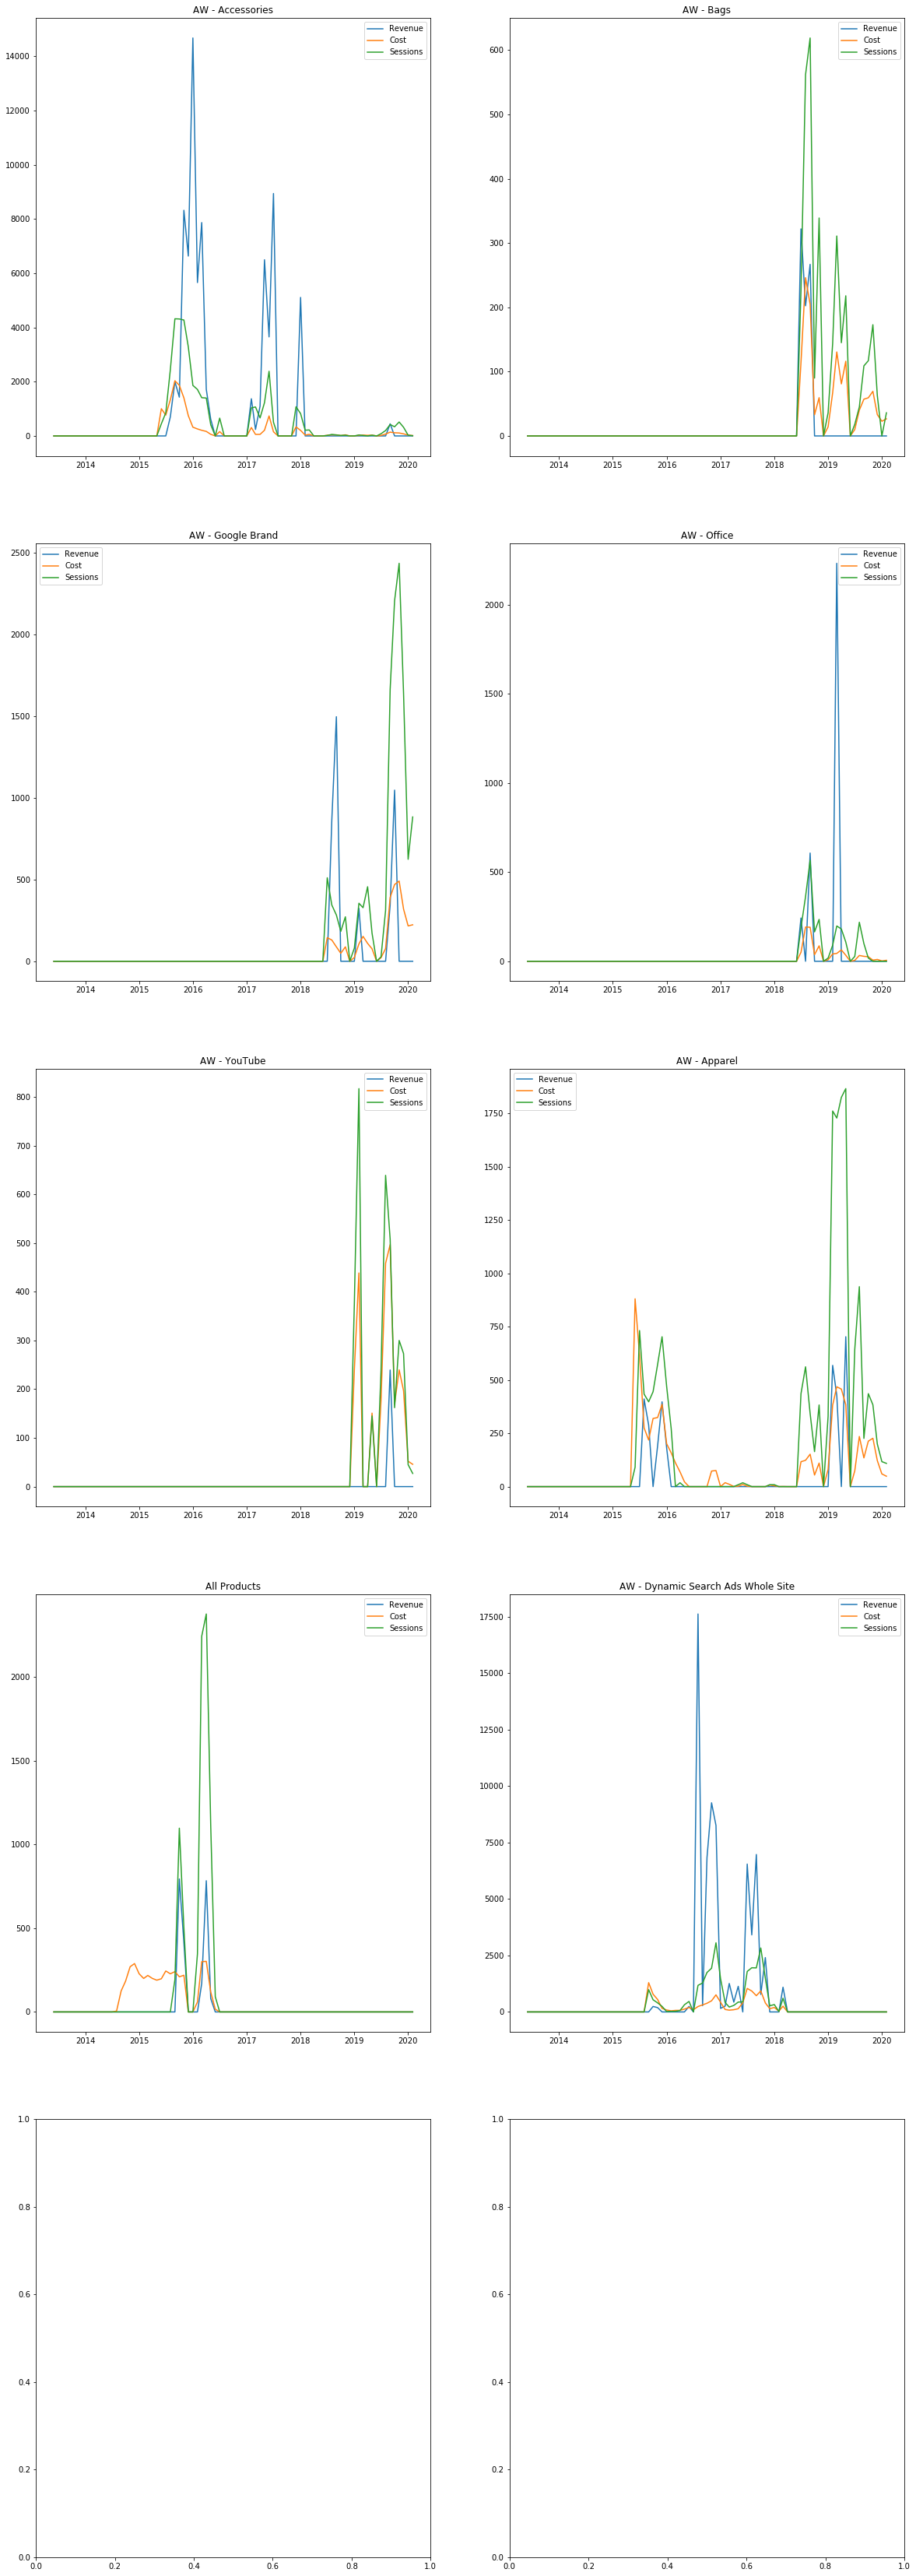

In [21]:
# Convert dates into months
dfOnlyMonth = costPositiveDf.copy()
dfOnlyMonth["Date (month)"] = dfOnlyMonth["Date"].map(lambda x : pd.to_datetime("%s%s" % (x.year, x.month), format="%Y%m"))
# Do a list of all dates between earliest and latest
dateRange = pd.date_range(dfOnlyMonth["Date (month)"].min(), dfOnlyMonth["Date (month)"].max(), freq="M")
dateRange = pd.DataFrame({
    "Date (month)" : list(map(lambda x : pd.to_datetime("%s%s" % (x.year, x.month), format="%Y%m"), dateRange))
})

nRows = len(campaigns) // 2 + 1
ax = plt.subplots(nRows, 2, figsize=(20, 60))[1]

for i, campaign in enumerate(campaigns):
    dfRelevant = dfOnlyMonth[dfOnlyMonth["Campaign"] == campaign]
    dfMonthly = dfRelevant.groupby("Date (month)").sum().reset_index()
    # Fill missing months by zeros
    dfMonthly = dateRange.set_index("Date (month)").join(dfMonthly.set_index("Date (month)")).fillna(0)
#     dfCounts = dfRelevant.groupby("Date (month)").count().reset_index()["Cost"]
    dfMonthly = dfMonthly.sort_values("Date (month)")
    dfMonthly["Revenue - Cost"] = dfMonthly["Revenue"] - dfMonthly["Cost"]
#     dfMonthly["Counts"] = dfCounts
    
    xticks = dfMonthly.index.map(lambda x : "%d-%d" % (x.year, x.month))
    ax[i//2][i%2].plot(dfMonthly.index, dfMonthly[["Revenue", "Cost", "Sessions"]])
    ax[i//2][i%2].set_title(campaign)
    ax[i//2][i%2].legend(["Revenue", "Cost", "Sessions"])

#### 3.1.2 Only relevant campaigns

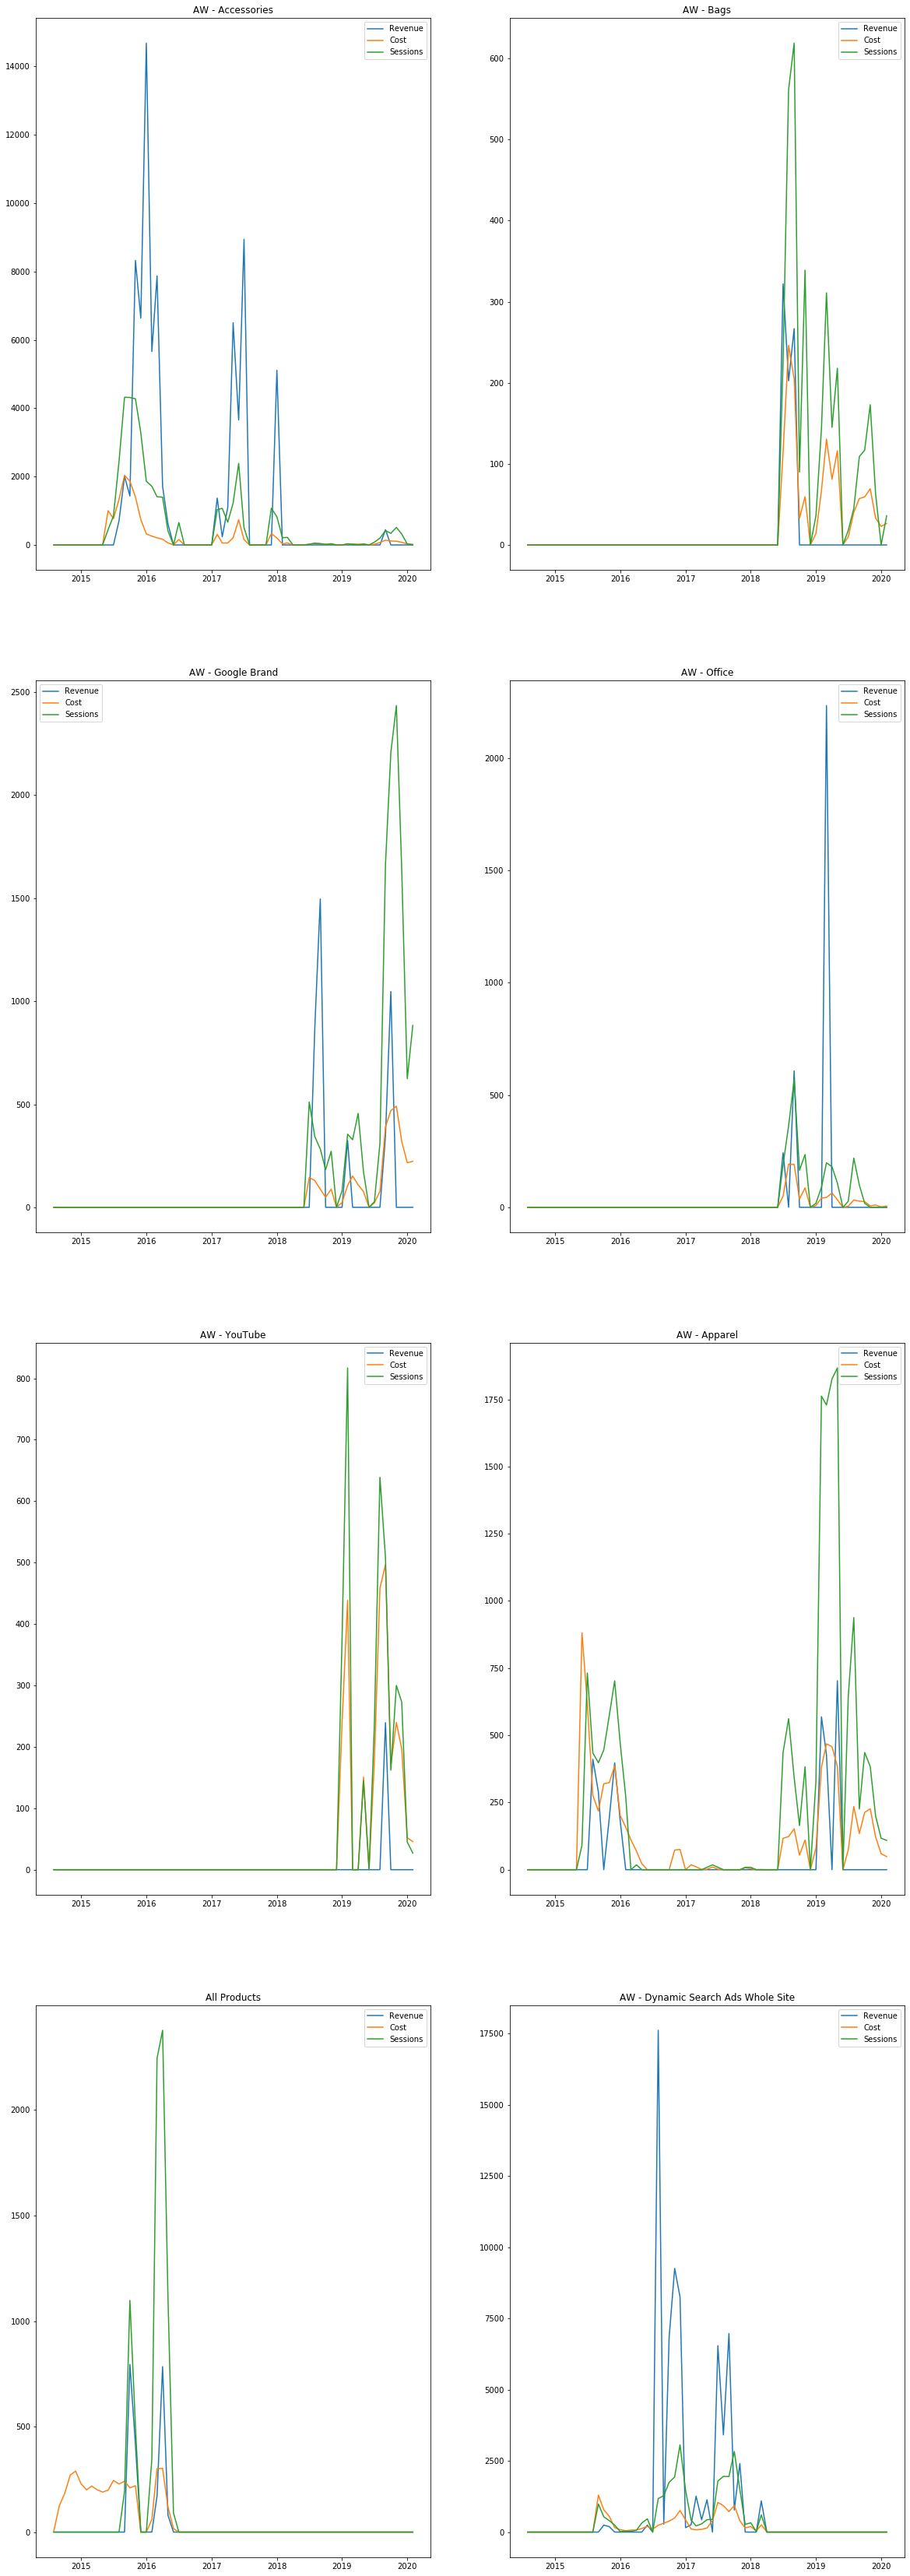

In [22]:
# Convert dates into months
dfOnlyMonth = validDf.copy()
campaigns = validDf["Campaign"].unique()
dfOnlyMonth["Date (month)"] = dfOnlyMonth["Date"].map(lambda x : pd.to_datetime("%s%s" % (x.year, x.month), format="%Y%m"))
# Do a list of all dates between earliest and latest
dateRange = pd.date_range(dfOnlyMonth["Date (month)"].min(), dfOnlyMonth["Date (month)"].max(), freq="M")
dateRange = pd.DataFrame({
    "Date (month)" : list(map(lambda x : pd.to_datetime("%s%s" % (x.year, x.month), format="%Y%m"), dateRange))
})

nRows = len(campaigns) // 2
ax = plt.subplots(nRows, 2, figsize=(20, 60))[1]

for i, campaign in enumerate(campaigns):
    dfRelevant = dfOnlyMonth[dfOnlyMonth["Campaign"] == campaign]
    dfMonthly = dfRelevant.groupby("Date (month)").sum().reset_index()
    # Fill missing months by zeros
    dfMonthly = dateRange.set_index("Date (month)").join(dfMonthly.set_index("Date (month)")).fillna(0)
#     dfCounts = dfRelevant.groupby("Date (month)").count().reset_index()["Cost"]
    dfMonthly = dfMonthly.sort_values("Date (month)")
    dfMonthly["Revenue - Cost"] = dfMonthly["Revenue"] - dfMonthly["Cost"]
#     dfMonthly["Counts"] = dfCounts
    
    xticks = dfMonthly.index.map(lambda x : "%d-%d" % (x.year, x.month))
    ax[i//2][i%2].plot(dfMonthly.index, dfMonthly[["Revenue", "Cost", "Sessions"]])
    ax[i//2][i%2].set_title(campaign)
    ax[i//2][i%2].legend(["Revenue", "Cost", "Sessions"])

#### 3.2.2 Putting them all on the same axis for comparisons

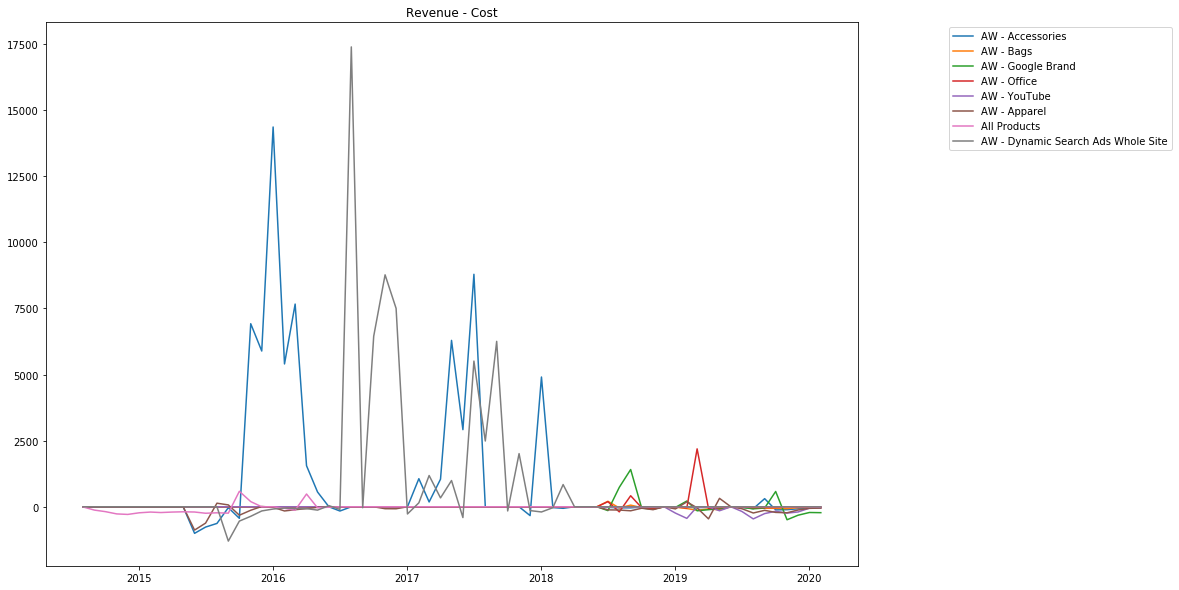

In [23]:
ax = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [4, 1]})[1]
for i, campaign in enumerate(validCampaigns):
    dfRelevant = dfOnlyMonth[dfOnlyMonth["Campaign"] == campaign]
    dfMonthly = dfRelevant.groupby("Date (month)").sum().reset_index()
    dfMonthly = dateRange.set_index("Date (month)").join(dfMonthly.set_index("Date (month)")).fillna(0)
    dfMonthly = dfMonthly.sort_values("Date (month)")
    dfMonthly["Revenue - Cost"] = dfMonthly["Revenue"] - dfMonthly["Cost"]
    
    xticks = dfMonthly.index.map(lambda x : "%d-%d" % (x.year, x.month))
    ax[0].plot(dfMonthly.index, dfMonthly["Revenue - Cost"], label=campaign)
ax[1].legend(*ax[0].get_legend_handles_labels(), loc = "upper center")
ax[1].axis("off")
ax[0].set_title("Revenue - Cost")
plt.show()


#### 3.2.3 Monthly overall

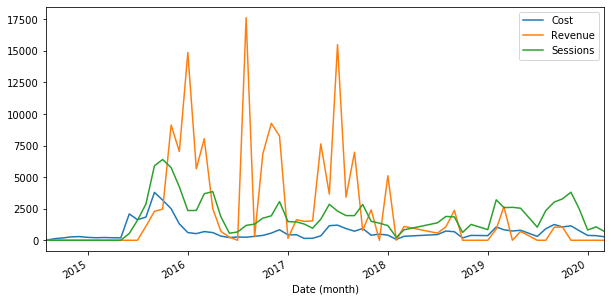

In [24]:
dfSumMonthly = dfOnlyMonth.groupby("Date (month)").sum().reset_index()
dfSumMonthly["Revenue - Cost"] = dfSumMonthly["Revenue"] - dfSumMonthly["Cost"]
dfSumMonthly.plot("Date (month)", ["Cost", "Revenue", "Sessions"])

We see that there is clear correlation between overall cost, revenue and number of sessions. However, this happened after about 1.5 years, so we can guess that the initial campaigns were not very successful. Then, around the second half of 2015, the "AW - Electronics" campaign became very succesful and generated a lot of visitors and revenue. With this analysis, we can conclude that there are some good and some bad campaigns, however we can't really know what makes a campaign good or bad from this data alone.

### 3.3 Time series analysis (daily) 

#### 3.3.1 Each campaign independently, on a daily basis

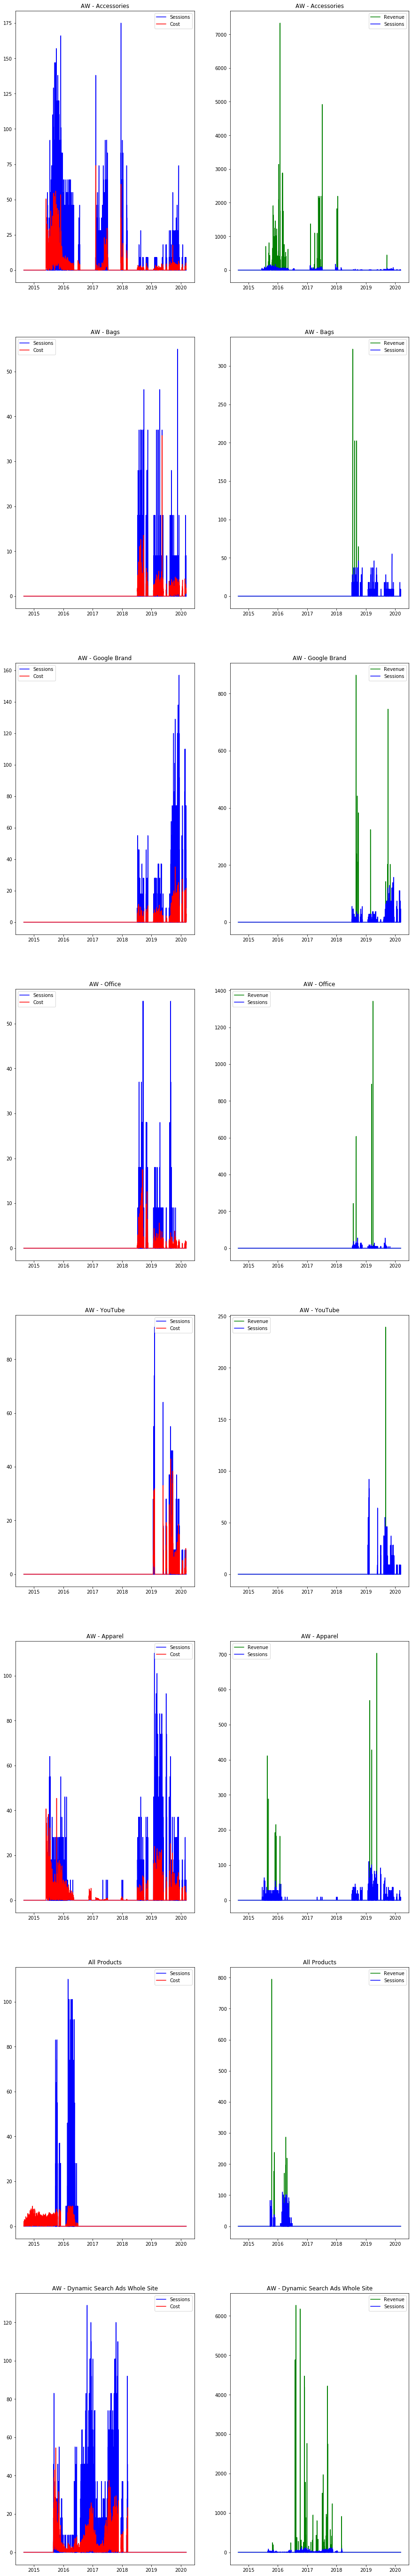

In [25]:
# Do a list of all dates between earliest and latest
dateRange = pd.DataFrame({
    "Date" : pd.date_range(validDf["Date"].min(), validDf["Date"].max(), freq="D"),
})
nRows = len(campaigns)
ax = plt.subplots(nRows, 2, figsize=(15, 100))[1]

for i, campaign in enumerate(campaigns):
    dfRelevant = validDf[validDf["Campaign"] == campaign]
    # Fill missing months by zeros
    dfRelevant = dateRange.set_index("Date").join(dfRelevant.set_index("Date")).fillna(0)
    dfRelevant = dfRelevant.reset_index().sort_values("Date")
    dfRelevant["Revenue - Cost"] = dfRelevant["Revenue"] - dfRelevant["Cost"]
    
    ax[i][0].plot(dfRelevant["Date"], dfRelevant["Sessions"], color="blue")
    ax[i][0].plot(dfRelevant["Date"], dfRelevant["Cost"], color="red")
    ax[i][0].set_title(campaign)
    ax[i][0].legend(["Sessions", "Cost"])

    ax[i][1].plot(dfRelevant["Date"], dfRelevant["Revenue"], color="green")
    ax[i][1].plot(dfRelevant["Date"], dfRelevant["Sessions"], color="blue")
    ax[i][1].set_title(campaign)
    ax[i][1].legend(["Revenue", "Sessions"])

## Storing the final dataframe for further use

In [26]:
validDf.to_csv("../data/valid_dataset_minimal_day1_2.csv")